# Sentiment analysis of collected tweets.

---



# Importing libraries

In [100]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split 
from wordcloud import WordCloud
from nltk import tokenize


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk

In [ ]:
nltk.download('all')

# Loading data

In [54]:
df_tweets = pd.read_csv("/content/drive/MyDrive/DI - Analise Bitcoin - GPU/4. Execução/1. Organização dos Dados Coletados/0. Dados Organizados/Tweets.csv")
df_bitcoin = pd.read_csv("/content/drive/MyDrive/DI - Analise Bitcoin - GPU/4. Execução/1. Organização dos Dados Coletados/0. Dados Organizados/BTC-organized.csv")

In [86]:
df_tweets['Tweet'] = df_tweets['Tweet'].astype(str)
df_tweets

,Unnamed: 0,Tweet,User,Date
0,0,"Do you think #bitcoin will reach $500K, $288K ...",@100trillionUSD,2021-10-3
1,1,"Do you think #bitcoin will reach $500K, $288K ...",@100trillionUSD,2021-9-11
2,2,43k,@100trillionUSD,2021-9-7
3,3,"Do you think #bitcoin will reach $500K, $288K ...",@100trillionUSD,2021-8-15
4,4,So was $64K the top for this cycle (halving 20...,@100trillionUSD,2021-7-1
...,...,...,...,...
64940,64952,And it's started... #tedxtearo nice work guys!,@woonomic,2012-11-30
64941,64953,On knowledge: Circa 1400 a book cost you the p...,@woonomic,2011-3-7
64942,64954,"Opened up my new MacBook Pro 13 Unibody. Wow, ...",@woonomic,2009-10-9
64943,64955,GMail Tip: just discovered you can drag label...,@woonomic,2009-7-29


In [56]:
df_bitcoin

,Date,Price,Uprise
0,2021-10-18,62026.078125,1
1,2021-10-17,61553.617188,1
2,2021-10-16,60892.179688,0
3,2021-10-15,61593.949219,1
4,2021-10-14,57321.523438,0
...,...,...,...
2584,2014-09-21,398.821014,0
2585,2014-09-20,408.903992,1
2586,2014-09-19,394.795990,0
2587,2014-09-18,424.440002,0


# Analyze of tweets column with a Word Cloud

A list of all phrase

In [109]:
all_phrase = [tweet for tweet in df_tweets['Tweet']]
agg_phrase = ' '.join(all_phrase)

Agglutinating the phrase

In [110]:
agg_phrase = ' '.join(agg_phrase)

Creating the Word Cloud

In [111]:
tw_wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,
                          collocations = False).generate(agg_phases)

Plotting the word cloud

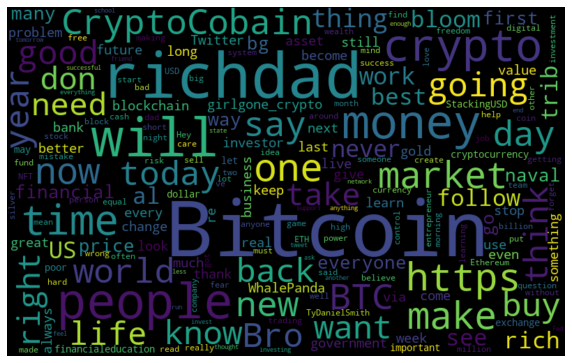

In [112]:
plt.figure(figsize=(10, 7))
plt.imshow(tw_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Tokenization to create a new view

Tokenization with white spaces

In [91]:
all_phases = [tweet for tweet in df_tweets['Tweet']]
agg_phases = ' '.join(all_phases)

In [ ]:
tokenizer_white_spaces = tokenize.WhitespaceTokenizer()
tokenized_phases = tokenizer_white_spaces.tokenize(agg_phases)
frequency = nltk.FreqDist(tokenized_phases)

## Creating a DataFrame to analyse the frequency

In [96]:
df_tw_words_frequency = pd.DataFrame(
    {
        'Words': list(frequency.keys()),
        'Frequency': list(frequency.values())
    }
)

In [98]:
df_tw_words_frequency.head()

,Words,Frequency
0,Do,488
1,you,14732
2,think,1489
3,#bitcoin,948
4,will,5338


In [102]:
top_10_frequent_words = df_tw_words_frequency.nlargest(columns='Frequency', n=10)
top_10_frequent_words

,Words,Frequency
26,the,36234
51,to,30322
37,a,21770
64,is,20148
79,of,18725
43,and,18019
1,you,14732
36,in,13415
28,for,10558
155,I,9267


View of the top 10 most frequent words

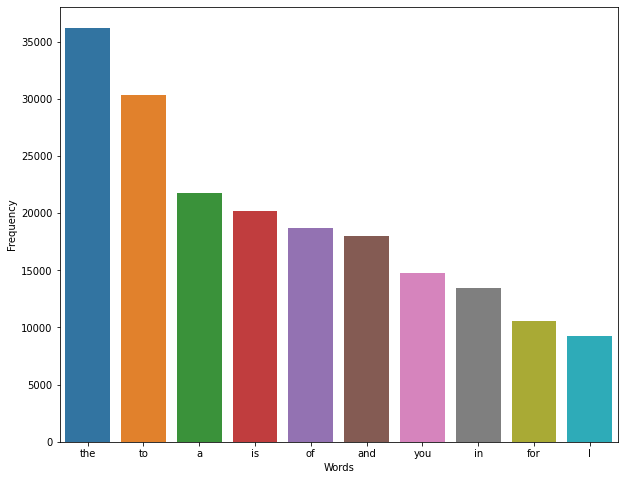

In [106]:
plt.figure(figsize=(10,8))
sns.barplot(data=top_10_frequent_words, x='Words', y='Frequency')
plt.show()

This words doesn't add up to our analysis, will be necessary to clean some of this words before start the sentiment analysis

# Tweets column optimization pipeline

To remove some of this words, will be used the stopwords from nltk library

In [ ]:
initial_stopwords = nltk.corpus.stopwords.words("english")
initial_stopwords

# Development of Sentiment Analysis

## Bag of Words


### Creating a vectorizer

In [57]:
vectorizer = CountVectorizer(max_features=50)

In [61]:
bag_of_words = vectorizer.fit_transform(
    df_tweets['Tweet']
)

In [63]:
bag_of_words.shape

(64945, 50)

### Bag of words return a sparse matrix

In [64]:
sparse_matrix =  pd.DataFrame.sparse.from_spmatrix(
    bag_of_words,
    columns=vectorizer.get_feature_names()
)

In [65]:
sparse_matrix

,about,all,an,and,are,as,at,be,bitcoin,but,by,can,crypto,do,don,for,from,get,has,have,https,if,in,is,it,just,money,more,my,not,of,on,one,or,people,richdad,that,the,they,this,time,to,we,what,when,who,will,with,you,your
0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0
1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0
4,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,2,0,0,2,0,0,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64940,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
64941,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
64942,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
64943,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0
